**ROC Curve --**
ROC Curves plot the 'true positive' on the y-axis and 'false nagative' on the x-axis, making the top left corner of the plot "ideal" and the bottom right corner of the plot "really bad". The larger the area under the ROC curve, the better! Steepness of the ROC curve is also important, because you want to maximize true positives at the begining. 

ROC @ scikit learn - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In this example, we will plot an ROC curve for the Iris Data (also used for unsupervised learning last week)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

**Enter code for your classifier here:** please work with a partner (or 2 or 3) and select a classifier and enter code to use that classifier and learn from the data, using the set up above.

In [ ]:
from sklearn.multiclass import # your classifier
classifier = # **your code here**
y_score = # **your code here**

**Compute the FPR & TPR curve** please enter code below to calculte the false positive rate (fpr) & true positive rate (tpr) using the "roc_curve" and "auc" functions

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(# **your code here**)
    roc_auc[i] = auc(# **your code here**)

**Plot the ROC curve** please run the following code below to plot the ROC curve (false positive rate (fpr) vs. true positive rate (tpr)) for one of the classes with ROC curve area under the curve.

We will compare results across different classifiers selected in the journal club.

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Calculate Multiclass FPR & TPR Curve** in order to calculte the multi-class ROC curve, we will take the average FPR and TPR of all the classes.

In [6]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = # **your code here**

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += # **your code here**

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

ValueError: zero-dimensional arrays cannot be concatenated

**Plot the multiclass ROC curve** along with the individual ROC curves in the background

In [ ]:
# Plot all ROC curves
plt.figure()

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

** Confusion Matrix with Digits Dataset -- ** Now we will switch gears and calculate the confusion matrix on the digits dataset (same dataset used in supervised learning session) 

SciKit Learn Confusion Matrix -- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

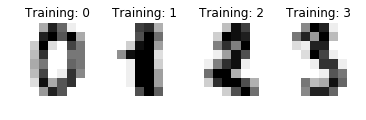

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


**Select a classifier for the digits dataset and classify the first half of data** Hint: you may need to flatten the image & turn data into a (samples, feature) matrix

In [ ]:
from sklearn import # your classifier

# data reshape -- **your code here**

# train you classifier on the digits in the first half of the data
classifier = # **your code here**
classifier.fit(# **your code here**)

**Apply your classifier to predict the digits in the second half of the data**

In [8]:
# Now predict the value of the digit on the second half:
expected = # **your code here**
predicted = # **your code here**

SyntaxError: invalid syntax (<ipython-input-8-01f16110cbfc>, line 2)

**Run the code below to print your confusion matrix and plot your results**

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()